### This is basically the overall of machine learning. I create this as my main reference for creating ML model.
### The dataset that i used is Pima indian Diabetes.
### My main reference for this notebook is Machine Learning Mastery with Python Understand Your Data, Create Accurate Models and Work Projects End-To-End by Jason Brownlee
### Full credit is given to Jason Brownlee, the author of the book.
### The book can be bought here https://machinelearningmastery.com/machine-learning-with-python/

In [7]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.csv', names=header)
data.shape

(768, 9)

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

# 1. Data exploration with descriptive statistic

In [10]:
data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
n = data.loc[data["age"] == 21]
n.loc[n["class"] == 1]
# same as n.loc[data.loc[data["age"] == 21]["class"] == 1]
#nak tengok umur 21 yang ada diabetes

,preg,plas,pres,skin,test,mass,pedi,age,class
220,0,177,60,29,478,34.6,1.072,21,1
255,1,113,64,35,0,33.6,0.543,21,1
414,0,138,60,35,167,34.6,0.534,21,1
577,2,118,80,0,0,42.9,0.693,21,1
580,0,151,90,46,0,42.1,0.371,21,1


In [13]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [14]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


In [15]:
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


# 2. Data correlation

In [16]:
correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


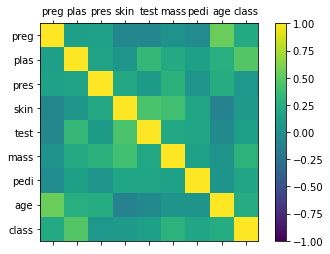

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(header)
ax.set_yticklabels(header)
plt.show()

# 3. Data Skewness

In [18]:
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


# 4. Data visualization

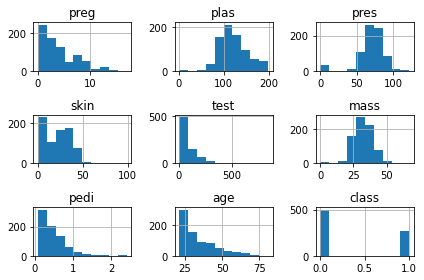

In [19]:
#histogram plot
data.hist()
plt.tight_layout() #to avoid overlap title
plt.show()

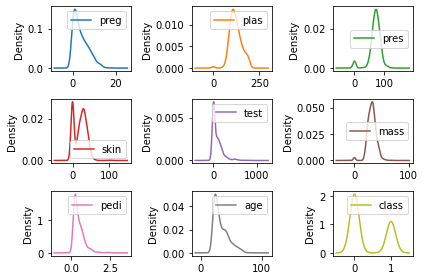

In [20]:
#density plot
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

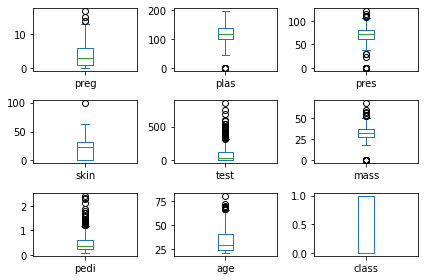

In [21]:
#box and whisker plot
data.plot(kind='box', subplots=True, layout=(3,3), sharey=False)
plt.tight_layout()
plt.show()

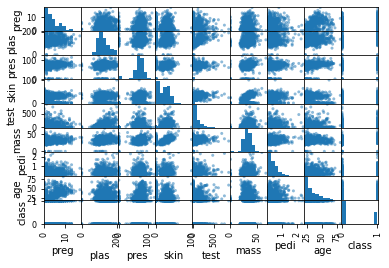

In [22]:
pd.plotting.scatter_matrix(data)
#plt.gcf().set_size_inches(8, 8) #resize graph by inch
plt.show()

# 5. Data pre-processing/ Data manipulation

In [23]:
from sklearn.preprocessing import MinMaxScaler #to rescale data
from sklearn.preprocessing import StandardScaler #to standardize data
from sklearn.preprocessing import Normalizer #to normalize data

from sklearn.preprocessing import Binarizer #to create new binary attribute

In [25]:
array = data.values
X = array[:,0:8]
Y = array[:,8]

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [27]:
scaler = StandardScaler().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [28]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [29]:
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
np.set_printoptions(precision=3) 
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# 6. Feature selection

In [30]:
#chi-squared (chi2) statistical test for non-negative features to select 4 of the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#RFE with the logistic regression algorithm to select the top 3 features.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#PCA and select 3 principal components
from sklearn.decomposition import PCA

#ExtraTreesClassifier to estimate the importance of features
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
array = data.values
X = array[:,0:8]
Y = array[:,8]

In [32]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [33]:
# feature extraction
rfe = RFE(LogisticRegression(), 3)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


In [34]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [35]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.112 0.229 0.101 0.079 0.076 0.145 0.12  0.139]


# 7. ML Algorithm Evaluation

In [36]:
# Train and Test Sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# k-fold Cross Validation.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Leave One Out Cross Validation.
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Repeated Random Test-Train Splits.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [37]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print("Accuracy: {}%".format(result*100.0))

Accuracy: 78.74015748031496%


In [38]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: mean is {}% and std is {}%".format(results.mean()*100.0, results.std()*100.0))

Accuracy: mean is 77.86397812713604% and std is 4.7349677065593285%


In [39]:
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
resultss = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: mean is {}% and std is {}%".format(resultss.mean()*100.0, resultss.std()*100.0))

Accuracy: mean is 77.86458333333334% and std is 41.51584029812865%


In [40]:
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
resultsss = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: mean is {}% and std is {}%".format(resultsss.mean()*100.0, resultsss.std()*100.0))

Accuracy: mean is 76.9291338582677% and std is 2.5948436304384384%


# 8. ML Algorithm Performance Metrics

#### Classification Metrics



In [41]:
# Classification Accuracy.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logarithmic Loss.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Area Under RO Curve.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Confusion Matrix.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Classification Report.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [42]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: mean is {}% and std is {}%".format(results.mean()*100.0, results.std()*100.0))

Accuracy: mean is 77.86397812713604% and std is 4.7349677065593285%


In [43]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: mean is {}% and std is {}%".format(results.mean()*100.0, results.std()*100.0))

Accuracy: mean is -49.39961461952002% and std is 6.105912165333631%


In [44]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: mean is {}% and std is {}%".format(results.mean()*100.0, results.std()*100.0))

Accuracy: mean is 82.42081987288307% and std is 5.197563280359895%


In [45]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[142  20]
 [ 34  58]]


In [46]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



#### Regression Metrics

In [47]:
# Mean Absolute Error.
# Mean Squared Error.
# R2.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


# 9. Spot-Check Classification Algorithms

# 10.

# 11.